In [1]:
import numpy as np
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
from itertools import chain
from mpl_toolkits.basemap import Basemap
import os
import sys
import netCDF4 as nc 
import warnings
import pickle
sys.path.append('/home/erb/masterproject/MSCI_project/snow_ice/CS_IS_2p_LARM/')


In [2]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    # m.shadedrelief(scale=scale)
    m.drawlsmask(land_color='gray',ocean_color='white',lakes=True)
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def mask_observations(observations, inversion):
    new_inversion = np.copy(inversion)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                new_inversion[i][j] = np.nan
    return new_inversion


In [3]:
# change this according to date
icetype = np.load("/home/erb/masterproject/MSCI_project/snow_ice/carmen/icetype/CS2_25km_FYI_2018-2019.npy")

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")


In [10]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
for i in range(200):
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=icetype[:,:,i], cmap="coolwarm", vmin=0, vmax=1)
plt.title("First year ice - 2018/2019")

plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ff909c57a60> (for post_execute):


KeyboardInterrupt: 

In [16]:
# change this according to date
sie = "/home/erb/masterproject/MSCI_project/snow_ice/carmen/SIE/SIE_masking_25km_2018-2019_season.pkl"

lon_g = np.load("/home/erb/masterproject/MSCI_project/new_lon_25km.npy")
lat_g = np.load("/home/erb/masterproject/MSCI_project/new_lat_25km.npy")

f = open(sie,'rb')
sie_file = pickle.load(f)



sie  = sie_file['20190415']



In [17]:
for i in range(360):
    for j in range(360):
        if sie[i][j] < 0.7 : 
            sie[i][j] = 0

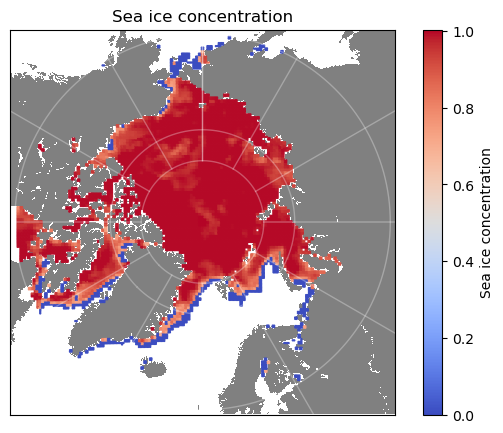

In [18]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=sie, cmap="coolwarm")
plt.colorbar(label=r'Sea ice concentration')
plt.title("Sea ice concentration")


plt.show()